# Kaggle Competition 1: Forecasting Sticker Sales - V0.4

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam, RMSprop

## Import Data
### Train data

In [2]:
df = pd.read_csv('train.csv')
df.head()

,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0


In [3]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

### Test Data

In [4]:
df_test = pd.read_csv('test.csv')
df_test.drop('id', axis=1, inplace=True)

## Handle missing values

In [5]:
df.dropna(inplace=True)
df.drop('id', axis=1, inplace=True)
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221259 entries, 0 to 221258
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   date      221259 non-null  object 
 1   country   221259 non-null  object 
 2   store     221259 non-null  object 
 3   product   221259 non-null  object 
 4   num_sold  221259 non-null  float64
dtypes: float64(1), object(4)
memory usage: 8.4+ MB


## Quantify Data
### Date

In [6]:
# Extract date-related features
def extract_date_features(data):
    data['date'] = pd.to_datetime(data['date'])
    data['year'] = data['date'].dt.year
    data['month'] = data['date'].dt.month
    data['day'] = data['date'].dt.day
    data['weekday'] = data['date'].dt.weekday
    data['weekofyear'] = data['date'].dt.isocalendar().week.astype(int)
    return data.drop(columns=['date'])

df = extract_date_features(df)
df_test = extract_date_features(df_test)

### One-Hot Encoding

In [7]:
# Train
df = df.join(pd.get_dummies(df['country'], prefix = 'country').astype(int)).drop('country', axis=1)
df = df.join(pd.get_dummies(df['store'], prefix = 'store').astype(int)).drop('store', axis=1)
df = df.join(pd.get_dummies(df['product'], prefix = 'product').astype(int)).drop('product', axis=1)

In [8]:
# Test
df_test = df_test.join(pd.get_dummies(df_test['country'], prefix = 'country').astype(int)).drop('country', axis=1)
df_test = df_test.join(pd.get_dummies(df_test['store'], prefix = 'store').astype(int)).drop('store', axis=1)
df_test = df_test.join(pd.get_dummies(df_test['product'], prefix = 'product').astype(int)).drop('product', axis=1)

## Split the Data

In [9]:
X = df.drop('num_sold', axis=1)
y = df['num_sold']

X_test = df_test

In [10]:
X_tr = X
X_val = X[210000:]

y_tr = y
y_val = y[210000:]

## Data Normalization

In [11]:
scaler = MinMaxScaler()
X_tr = scaler.fit_transform(X_tr)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

## Create Model

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu',input_shape=[19]),

    tf.keras.layers.Dense(8, activation='relu'),
    
    tf.keras.layers.Dense(1, activation='relu')
])

C:\Users\sajad\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error', metrics=['mean_absolute_percentage_error'])

In [14]:
hist = model.fit(X_tr, y_tr, epochs=100)

Epoch 1/100
6915/6915 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 63547.0156 - mean_absolute_percentage_error: 48.5140
Epoch 2/100
6915/6915 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 13706.9912 - mean_absolute_percentage_error: 11.5002
Epoch 3/100
6915/6915 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 9549.1104 - mean_absolute_percentage_error: 11.3213
Epoch 4/100
6915/6915 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 8676.3096 - mean_absolute_percentage_error: 9.8776
Epoch 5/100
6915/6915 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 7361.5400 - mean_absolute_percentage_error: 10.2320
Epoch 6/100
6915/6915 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 7052.2051 - mean_absolute_percentage_error: 9.3689
Epoch 7/100
6915/6915 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 6923.1548 - mean_absolute_percentage_error: 9.4958
Epoch 8/100
6915/6915 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 6473.6611 - mean_absolute_percentage_error: 9.3304
Epoch 9/100
6915/6915 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - loss: 6309.6851 

6915/6915 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 4540.8682 - mean_absolute_percentage_error: 9.9513
Epoch 56/100
6915/6915 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 4472.7354 - mean_absolute_percentage_error: 9.8323
Epoch 57/100
6915/6915 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 4433.3169 - mean_absolute_percentage_error: 9.7928
Epoch 58/100
6915/6915 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 4551.8408 - mean_absolute_percentage_error: 9.7415
Epoch 59/100
6915/6915 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 4486.0347 - mean_absolute_percentage_error: 9.7681
Epoch 60/100
6915/6915 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 4500.4512 - mean_absolute_percentage_error: 9.7770
Epoch 61/100
6915/6915 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 4455.1841 - mean_absolute_percentage_error: 9.6621
Epoch 62/100
6915/6915 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 4558.8315 - mean_absolute_percentage_error: 9.6069
Epoch 63/100
6915/6915 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 4437.8174 - mean_abs

## Visualization

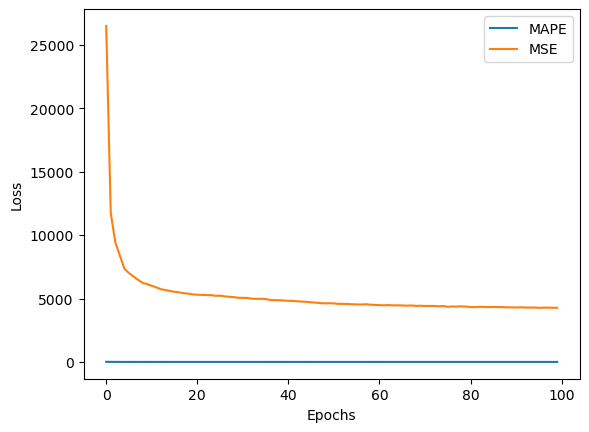

In [18]:
plt.figure()
plt.plot(hist.history['mean_absolute_percentage_error'])
plt.plot(hist.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['MAPE', 'MSE'])
plt.show()

## Make Predictions

In [16]:
predictions = model.predict(X_test)
predictions = predictions.reshape(98550,)

3080/3080 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


## Make Submisson

In [188]:
#predictions = predictions * 1.2

In [17]:
def make_submission(prediction, sub_name):
  my_submission = pd.DataFrame({'id':pd.read_csv('test.csv').id,'num_sold':prediction})
  my_submission.to_csv('{}.csv'.format(sub_name),index=False)
  print('A submission file has been made')

make_submission(predictions.astype(int),'submission(nn_v11)')

A submission file has been made
